In [1]:
import json
import pickle
from math import inf
from typing import Any, Dict, List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.misc.utils import remove_outliers
from root import from_root

In [2]:
plt.rcParams["figure.dpi"] = 227
sns.set_style("whitegrid")

def argmax(the_list: List[float]) -> int:
    best_index = None
    best_element = -inf
    
    for index, element in enumerate(the_list):
        if element > best_element:
            best_index = index
            best_element = element
    
    return best_index


def compute_accuracy(predictions: List[Dict[str, Any]]) -> float:
    n_correct = 0
    for prediction in predictions:
        pred_label = argmax(prediction["log_probs"])
        if prediction["true_label"] == pred_label:
            n_correct += 1
    return n_correct / len(predictions)


def center_text(ax, text: str, **kwargs) -> None:
    ax.text(0.5, 0.5, text, horizontalalignment="center", verticalalignment="center", **kwargs)

# Performance on CIFAR-10

In [94]:
models = (
    "resnet20_softmax", "resnet32_softmax", "resnet44_softmax", "resnet56_softmax",
    "resnet29v2_softmax", "resnet47v2_softmax", "resnet65v2_softmax", "resnet83v2_softmax",
    "resnet29v2_gaussian", "resnet47v2_gaussian", "resnet65v2_gaussian", "resnet83v2_gaussian"
)

data = []
for model in models:
    with open(from_root(f"results/{model}_cifar10/inference/id_train.json"), "r") as file:
        predictions = json.load(file)
    
    train_accuracy = compute_accuracy(predictions)
    data.append((model, train_accuracy, "Training set"))
    
    with open(from_root(f"results/{model}_cifar10/inference/id_val.json"), "r") as file:
        predictions = json.load(file)
    
    val_accuracy = compute_accuracy(predictions)
    data.append((model, val_accuracy, "Validation set"))
    
df = pd.DataFrame(data=data, columns=["Model", "Accuracy", "Split"])

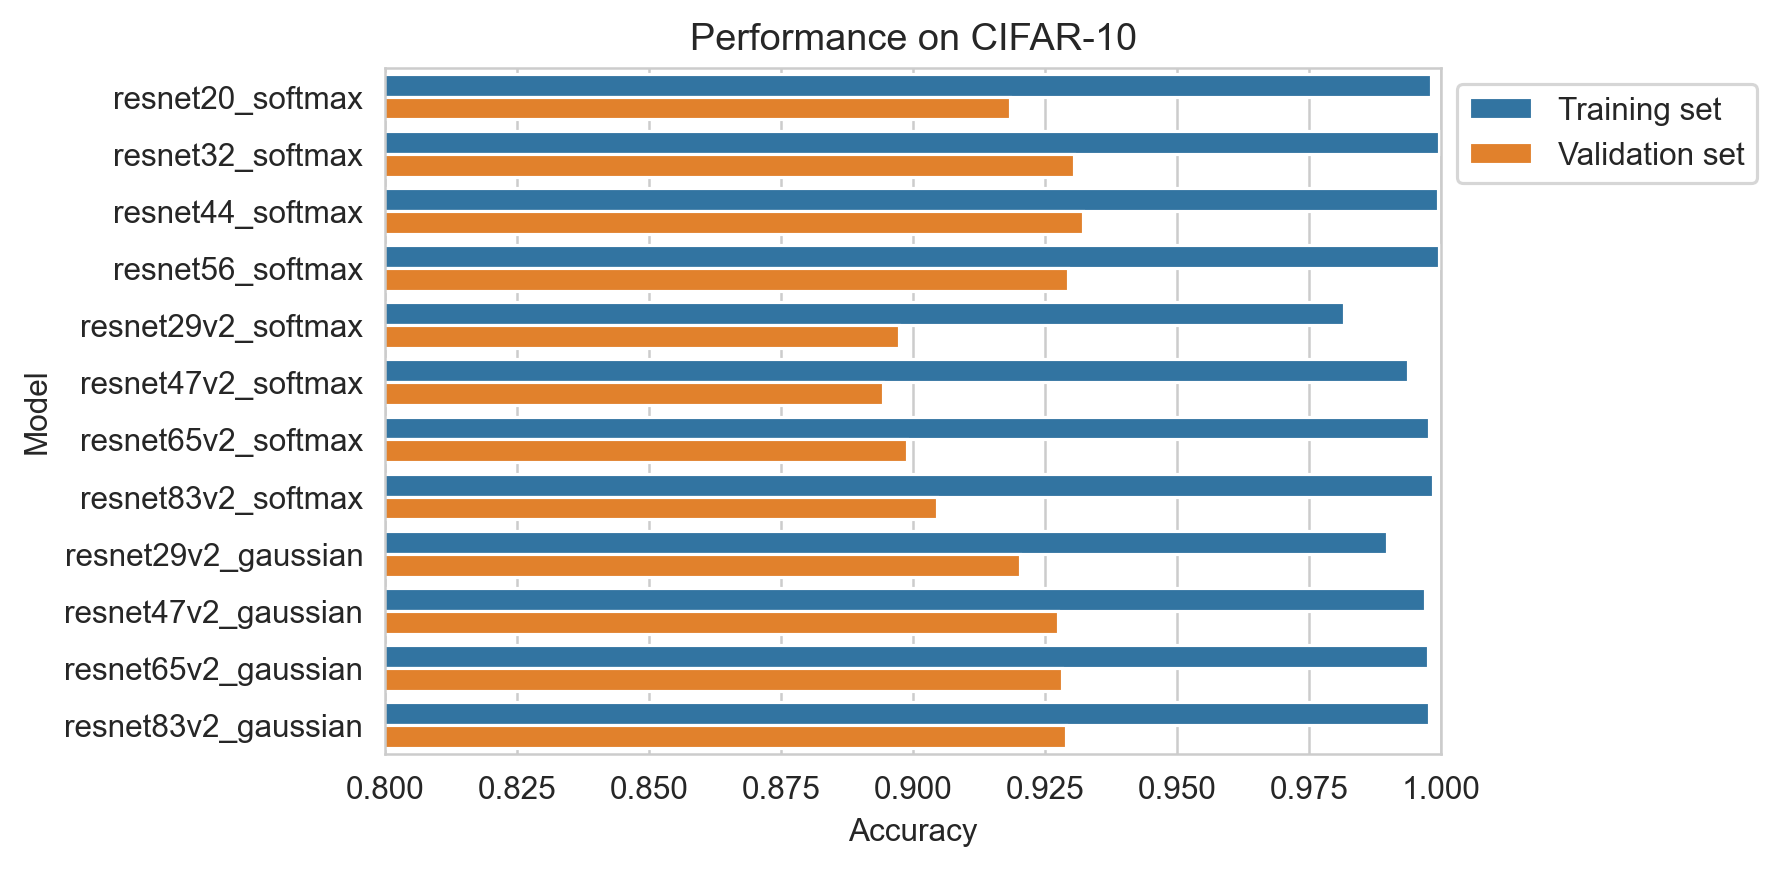

In [95]:
g = sns.barplot(x="Accuracy", y="Model", hue="Split", data=df)
g.set_title("Performance on CIFAR-10")
g.set_xlim(0.8, 1.0)
g.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Log-likelihood distribution on CIFAR-10

In [120]:
min_data = []
max_data = []

with open(from_root("results/resnet83v2_gaussian_cifar10/inference/id_train.json"), "r") as file:
    predictions = json.load(file)

for prediction in predictions:
    min_data.append((min(prediction["log_likelihoods"]), "Training set"))
    max_data.append((max(prediction["log_likelihoods"]), "Training set"))

with open(from_root("results/resnet83v2_gaussian_cifar10/inference/id_val.json"), "r") as file:
    predictions = json.load(file)

for prediction in predictions:
    min_data.append((min(prediction["log_likelihoods"]), "Validation set"))
    max_data.append((max(prediction["log_likelihoods"]), "Validation set"))

min_df = pd.DataFrame(data=min_data, columns=["Log-likelihood", "Split"])
max_df = pd.DataFrame(data=max_data, columns=["Log-likelihood", "Split"])

Text(0.5, 0.98, 'Log-likelihood distribution on CIFAR-10')

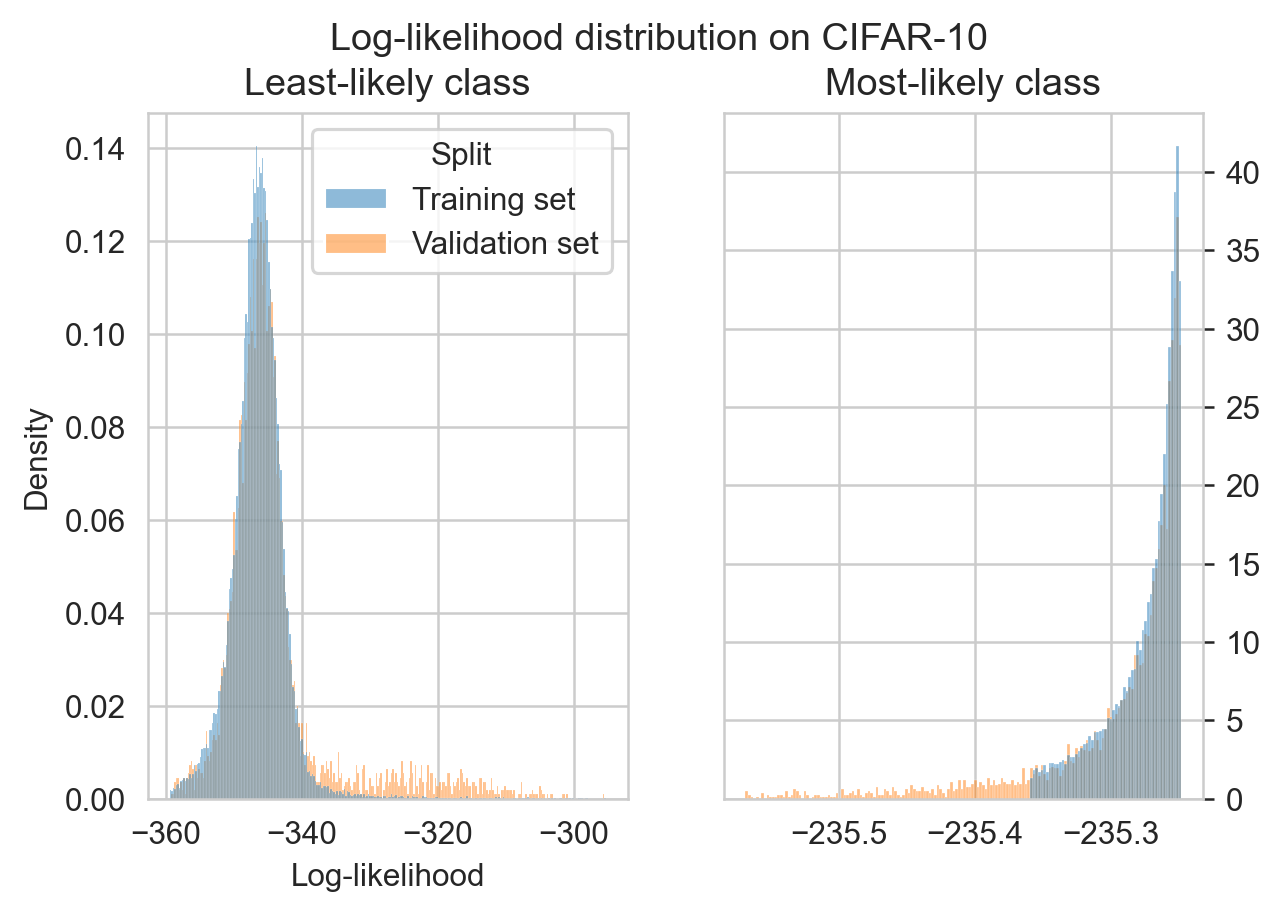

In [123]:
fig, (g1, g2) = plt.subplots(1, 2)

sns.histplot(
    remove_outliers(min_df, "Log-likelihood", "Split", min_q=1),
    x="Log-likelihood", hue="Split", stat="density", common_norm=False, ax=g1
)
g1.set_title("Least-likely class")

sns.histplot(
    remove_outliers(max_df, "Log-likelihood", "Split", min_q=15),
    x="Log-likelihood", hue="Split", legend=False, stat="density", common_norm=False, ax=g2
)
g2.set_xlabel(None)
g2.set_ylabel(None)
g2.yaxis.tick_right()
g2.set_title("Most-likely class")

fig.suptitle("Log-likelihood distribution on CIFAR-10")

# Log-likelihood distribution on SVHN validation set

In [124]:
min_data = []
max_data = []

with open(from_root("results/resnet83v2_gaussian_cifar10/inference/id_val.json"), "r") as file:
    predictions = json.load(file)

for prediction in predictions:
    min_data.append((min(prediction["log_likelihoods"]), "CIFAR-10"))
    max_data.append((max(prediction["log_likelihoods"]), "CIFAR-10"))

with open(from_root("results/resnet83v2_gaussian_cifar10/inference/ood_svhn.json"), "r") as file:
    predictions = json.load(file)

for prediction in predictions:
    min_data.append((min(prediction["log_likelihoods"]), "SVHN"))
    max_data.append((max(prediction["log_likelihoods"]), "SVHN"))

min_df = pd.DataFrame(data=min_data, columns=["Log-likelihood", "Dataset"])
max_df = pd.DataFrame(data=max_data, columns=["Log-likelihood", "Dataset"])

Text(0.5, 0.98, 'Log-likelihood distribution on SVHN')

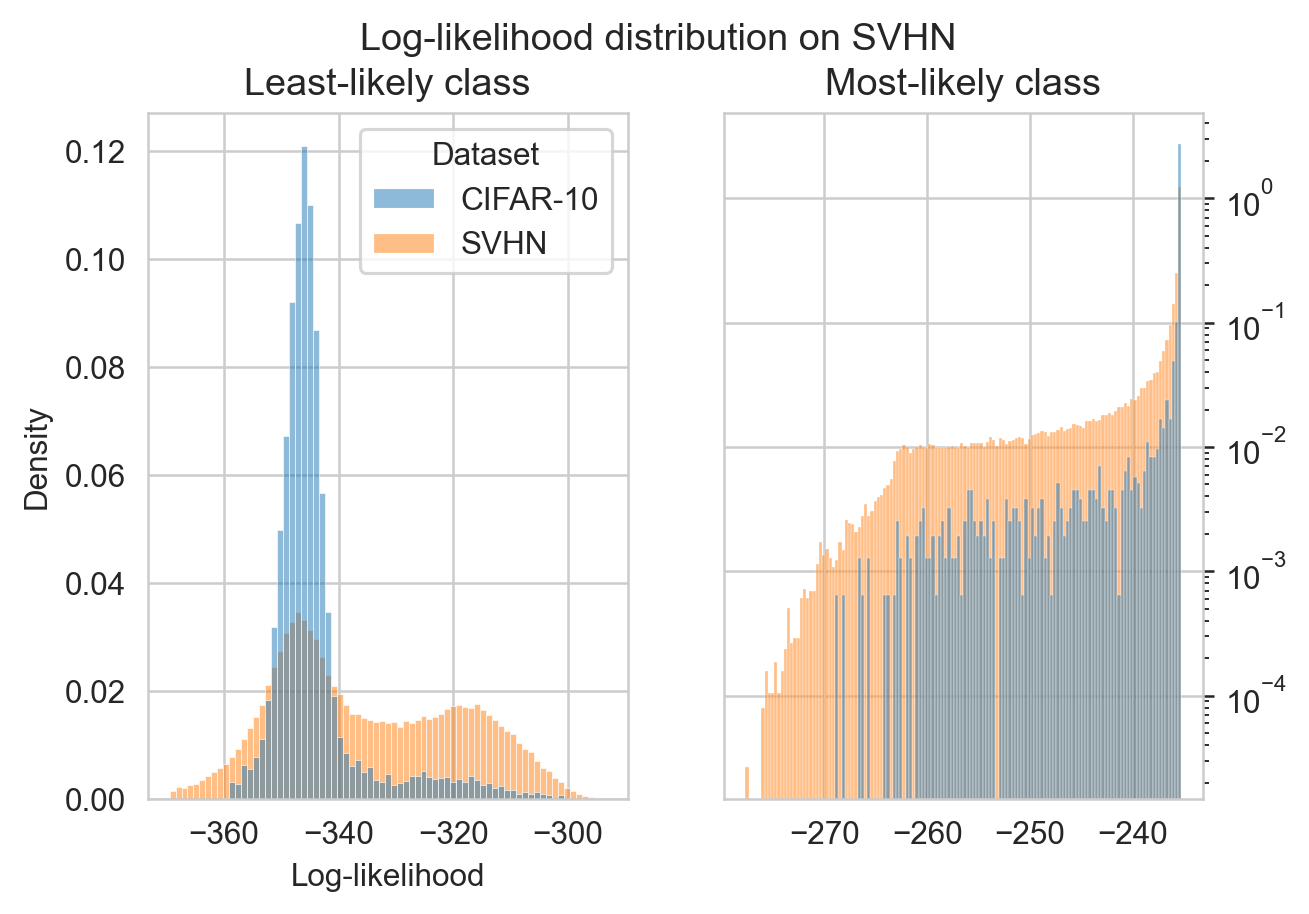

In [127]:
fig, (g1, g2) = plt.subplots(1, 2)

sns.histplot(
    remove_outliers(min_df, "Log-likelihood", "Dataset", min_q=1),
    x="Log-likelihood", hue="Dataset", stat="density", common_norm=False, ax=g1
)
g1.set_title("Least-likely class")

sns.histplot(max_df, x="Log-likelihood", hue="Dataset", legend=False, stat="density", common_norm=False, ax=g2)
g2.set_xlabel(None)
g2.set_ylabel(None)
g2.set_yscale("log")
g2.yaxis.tick_right()
g2.set_title("Most-likely class")

fig.suptitle("Log-likelihood distribution on SVHN")

# Log-likelihood distribution on MNIST validation set

In [129]:
min_data = []
max_data = []

with open(from_root("results/resnet83v2_gaussian_cifar10/inference/id_val.json"), "r") as file:
    predictions = json.load(file)

for prediction in predictions:
    min_data.append((min(prediction["log_likelihoods"]), "CIFAR-10"))
    max_data.append((max(prediction["log_likelihoods"]), "CIFAR-10"))

with open(from_root("results/resnet83v2_gaussian_cifar10/inference/ood_mnist.json"), "r") as file:
    predictions = json.load(file)

for prediction in predictions:
    min_data.append((min(prediction["log_likelihoods"]), "MNIST"))
    max_data.append((max(prediction["log_likelihoods"]), "MNIST"))

min_df = pd.DataFrame(data=min_data, columns=["Log-likelihood", "Dataset"])
max_df = pd.DataFrame(data=max_data, columns=["Log-likelihood", "Dataset"])

Text(0.5, 0.98, 'Log-likelihood distribution on MNIST')

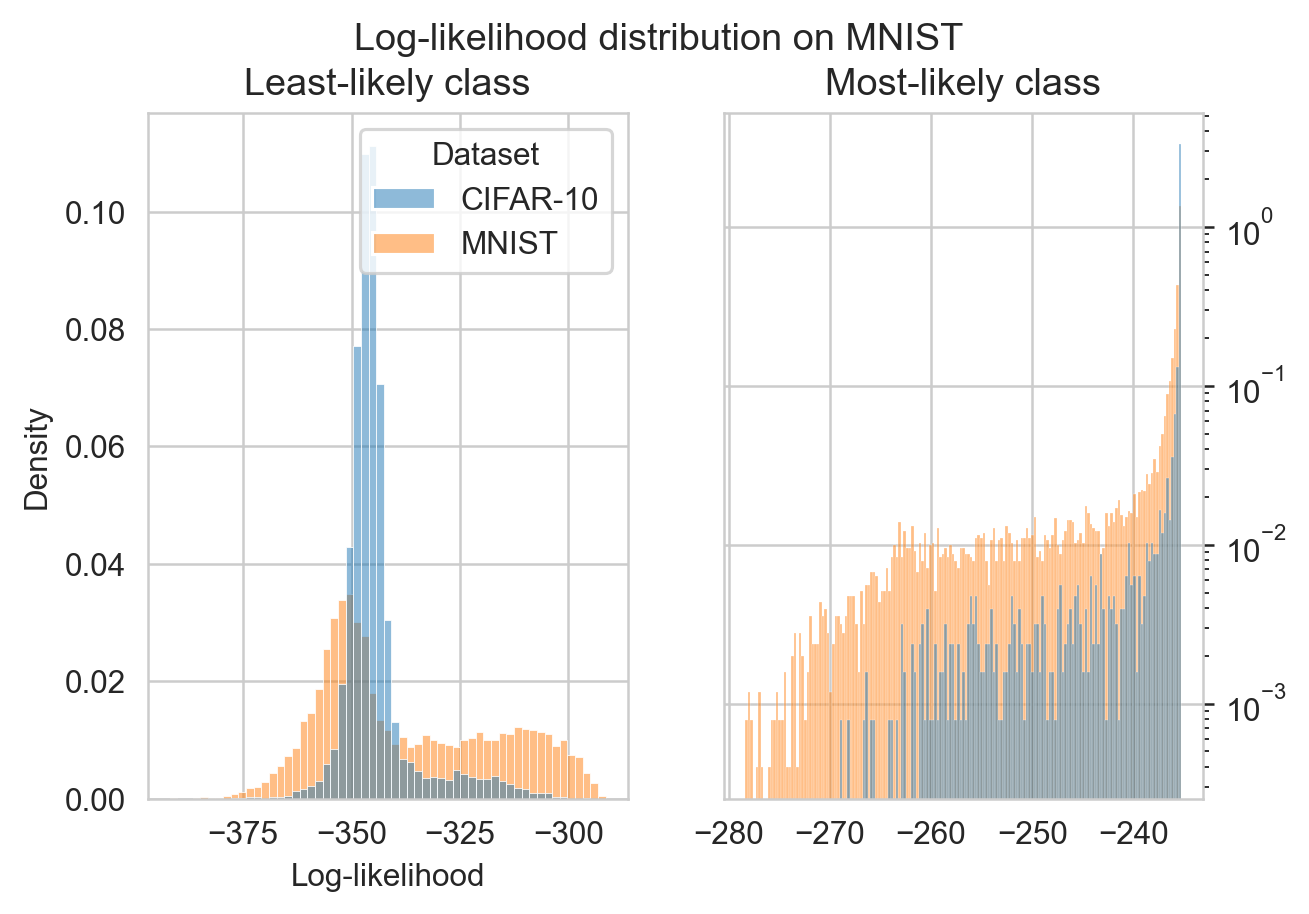

In [130]:
fig, (g1, g2) = plt.subplots(1, 2)

sns.histplot(min_df, x="Log-likelihood", hue="Dataset", stat="density", common_norm=False, ax=g1)
g1.set_title("Least-likely class")

sns.histplot(max_df, x="Log-likelihood", hue="Dataset", legend=False, stat="density", common_norm=False, ax=g2)
g2.set_xlabel(None)
g2.set_ylabel(None)
g2.set_yscale("log")
g2.yaxis.tick_right()
g2.set_title("Most-likely class")

fig.suptitle("Log-likelihood distribution on MNIST")

# Effect of FGSM

In [68]:
models = ("resnet56_softmax", "resnet83v2_softmax", "resnet83v2_gaussian")
epsilons = (0, 1, 2, 4, 8)

data = []
for model in models:
    for epsilon in epsilons:
        filepath = from_root(f"results/{model}_cifar10/inference/id_val.json") if epsilon == 0 \
            else from_root(f"results/{model}_cifar10/inference/fgsm_{epsilon}.json")
        
        with open(filepath, "r") as file:
            predictions = json.load(file)
        
        accuracy = compute_accuracy(predictions)
        data.append((epsilon, accuracy, model))
    
df = pd.DataFrame(data=data, columns=["Epsilon", "Accuracy", "Model"])

[(0.0, 1.0)]

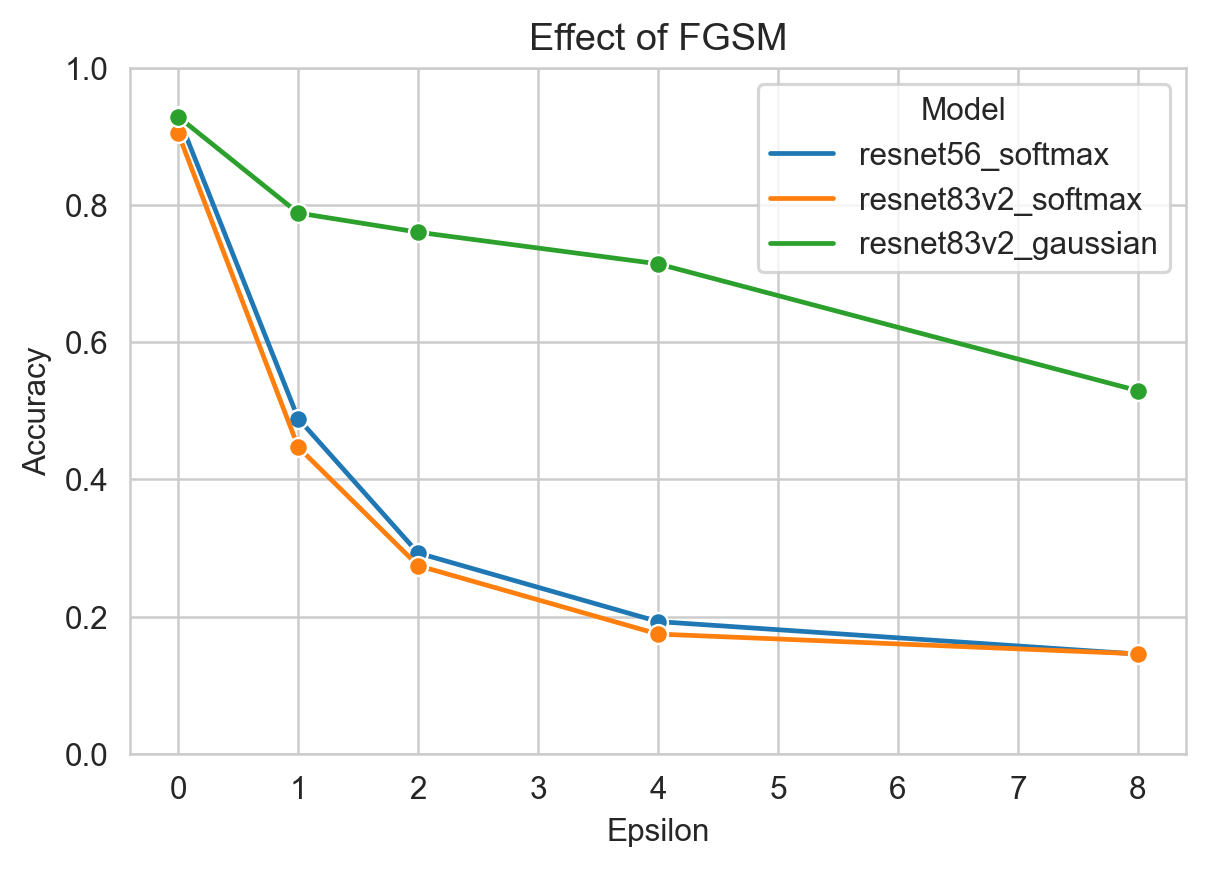

In [69]:
g = sns.lineplot(x="Epsilon", y="Accuracy", hue="Model", data=df, marker="o")
g.set_title("Effect of FGSM")
g.set(ylim=(0, 1))

# Effect of iterative FGSM (step size = 1)

In [70]:
models = ("resnet56_softmax", "resnet83v2_softmax", "resnet83v2_gaussian")
epsilons = (0, 1, 2, 4, 8)

data = []
for model in models:
    for epsilon in epsilons:
        filepath = from_root(f"results/{model}_cifar10/inference/id_val.json") if epsilon == 0 \
            else from_root(f"results/{model}_cifar10/inference/iterative_fgsm_{epsilon}.json")
        
        with open(filepath, "r") as file:
            predictions = json.load(file)
        
        accuracy = compute_accuracy(predictions)
        data.append((epsilon, accuracy, model))
    
df = pd.DataFrame(data=data, columns=["Epsilon", "Accuracy", "Model"])

[(0.0, 1.0)]

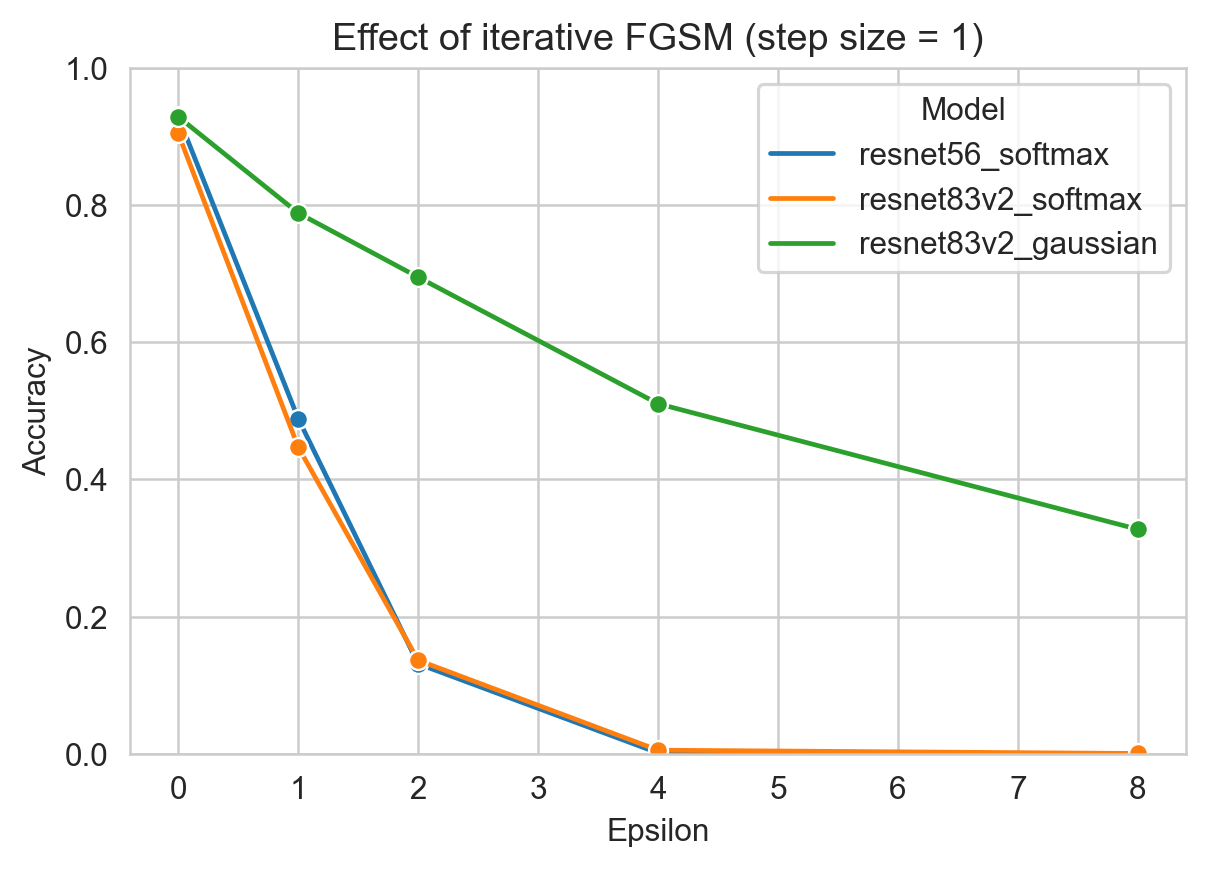

In [71]:
g = sns.lineplot(x="Epsilon", y="Accuracy", hue="Model", data=df, marker="o")
g.set_title("Effect of iterative FGSM (step size = 1)")
g.set(ylim=(0, 1))

# Effect of momentum FGSM (10 iterations, decay factor = 1.0)

In [72]:
models = ("resnet56_softmax", "resnet83v2_softmax", "resnet83v2_gaussian")
epsilons = (0, 1, 2, 4, 8)

data = []
for model in models:
    for epsilon in epsilons:
        filepath = from_root(f"results/{model}_cifar10/inference/id_val.json") if epsilon == 0 \
            else from_root(f"results/{model}_cifar10/inference/momentum_fgsm_{epsilon}.json")
        
        with open(filepath, "r") as file:
            predictions = json.load(file)
        
        accuracy = compute_accuracy(predictions)
        data.append((epsilon, accuracy, model))
    
df = pd.DataFrame(data=data, columns=["Epsilon", "Accuracy", "Model"])

[(0.0, 1.0)]

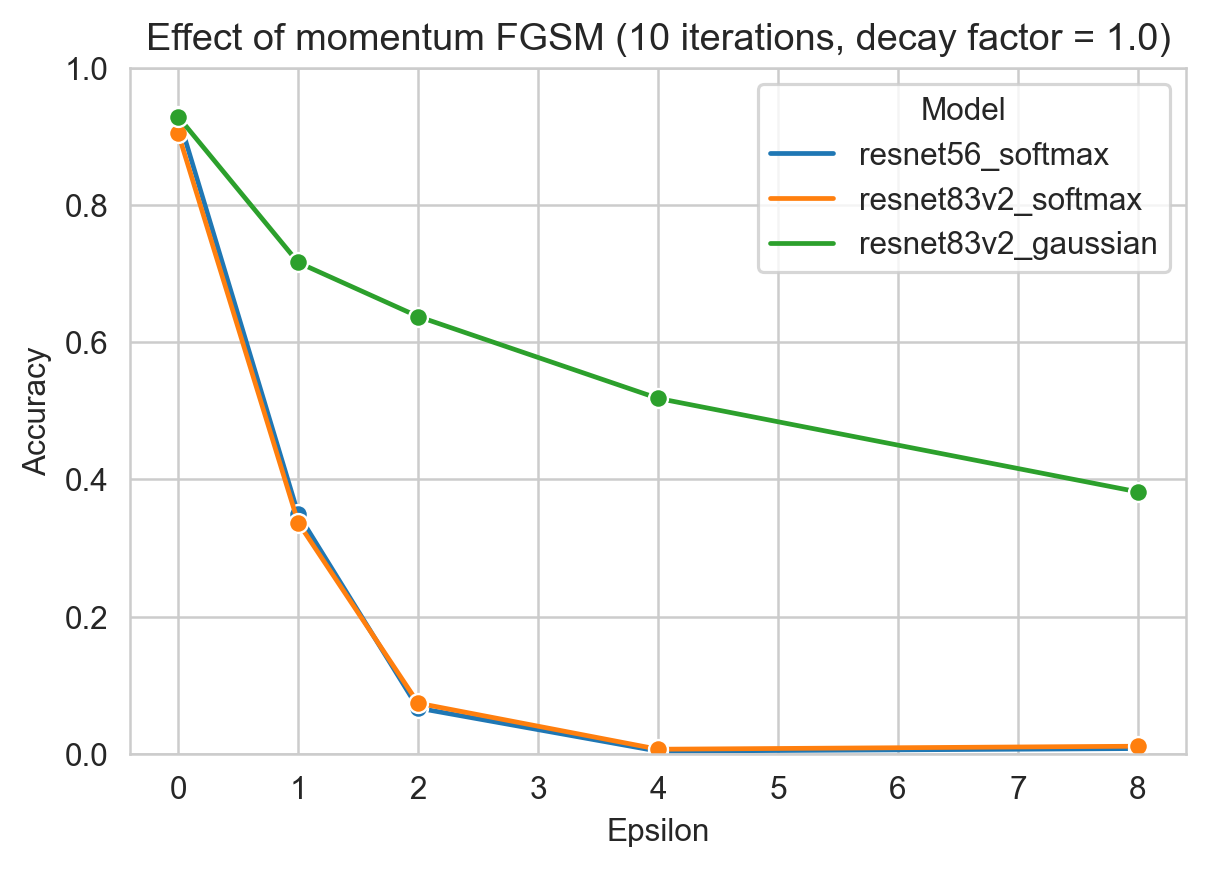

In [73]:
g = sns.lineplot(x="Epsilon", y="Accuracy", hue="Model", data=df, marker="o")
g.set_title("Effect of momentum FGSM (10 iterations, decay factor = 1.0)")
g.set(ylim=(0, 1))

# Effect of PGD (50 iterations, step size = 2)

In [74]:
models = ("resnet56_softmax", "resnet83v2_softmax", "resnet83v2_gaussian")
epsilons = (0, 1, 2, 4, 8)

data = []
for model in models:
    for epsilon in epsilons:
        filepath = from_root(f"results/{model}_cifar10/inference/id_val.json") if epsilon == 0 \
            else from_root(f"results/{model}_cifar10/inference/pgd_50_{epsilon}.json")
        
        with open(filepath, "r") as file:
            predictions = json.load(file)
        
        accuracy = compute_accuracy(predictions)
        data.append((epsilon, accuracy, model))
    
df = pd.DataFrame(data=data, columns=["Epsilon", "Accuracy", "Model"])

[(0.0, 1.0)]

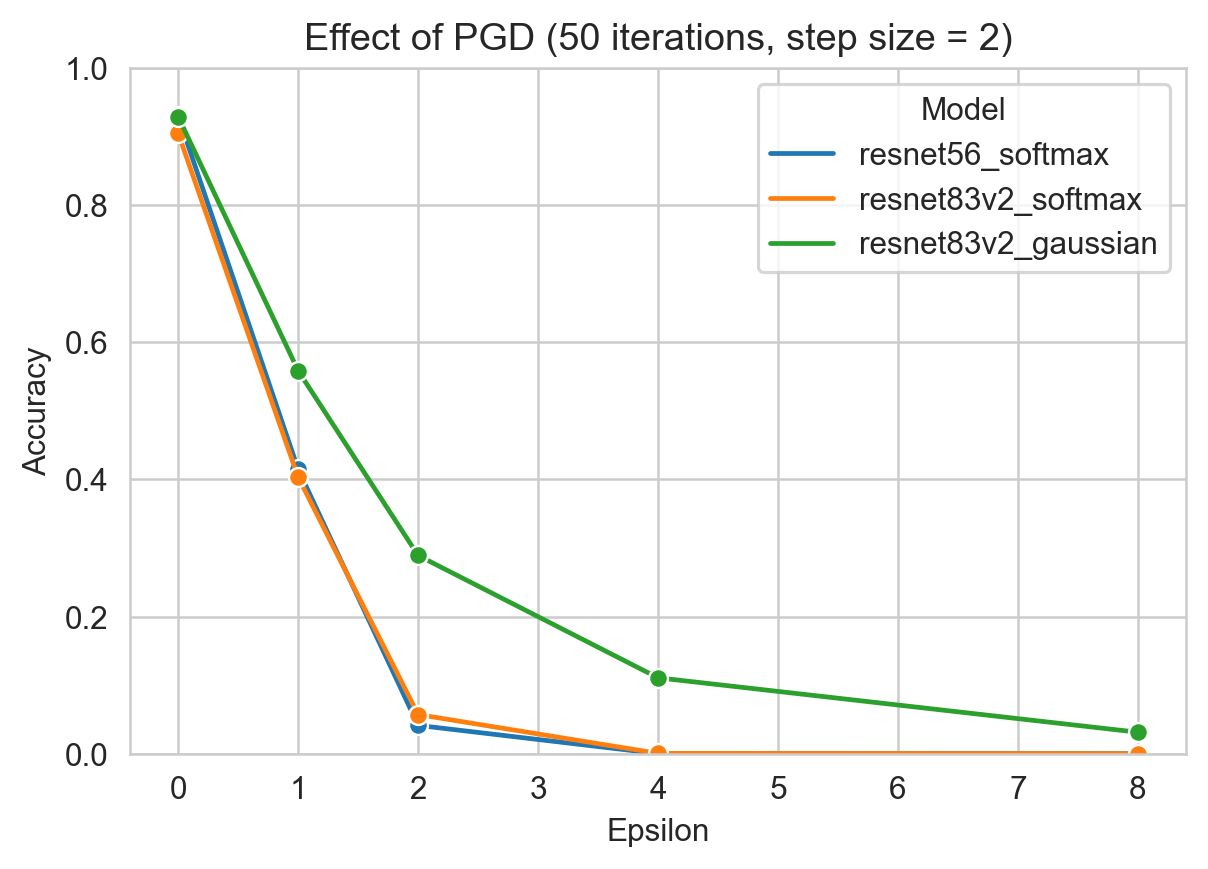

In [76]:
g = sns.lineplot(x="Epsilon", y="Accuracy", hue="Model", data=df, marker="o")
g.set_title("Effect of PGD (50 iterations, step size = 2)")
g.set(ylim=(0, 1))

# Comparison of PGD iterations (epsilon = 2)

In [82]:
models = ("resnet56_softmax", "resnet83v2_softmax", "resnet83v2_gaussian")
iterations = (10, 50, 100, 200)

data = []
for model in models:
    for n_iters in iterations:
        with open(from_root(f"results/{model}_cifar10/inference/pgd_{n_iters}_2.json"), "r") as file:
            predictions = json.load(file)
        
        accuracy = compute_accuracy(predictions)
        data.append((n_iters, accuracy, model))

df = pd.DataFrame(data=data, columns=["Iterations", "Accuracy", "Model"])

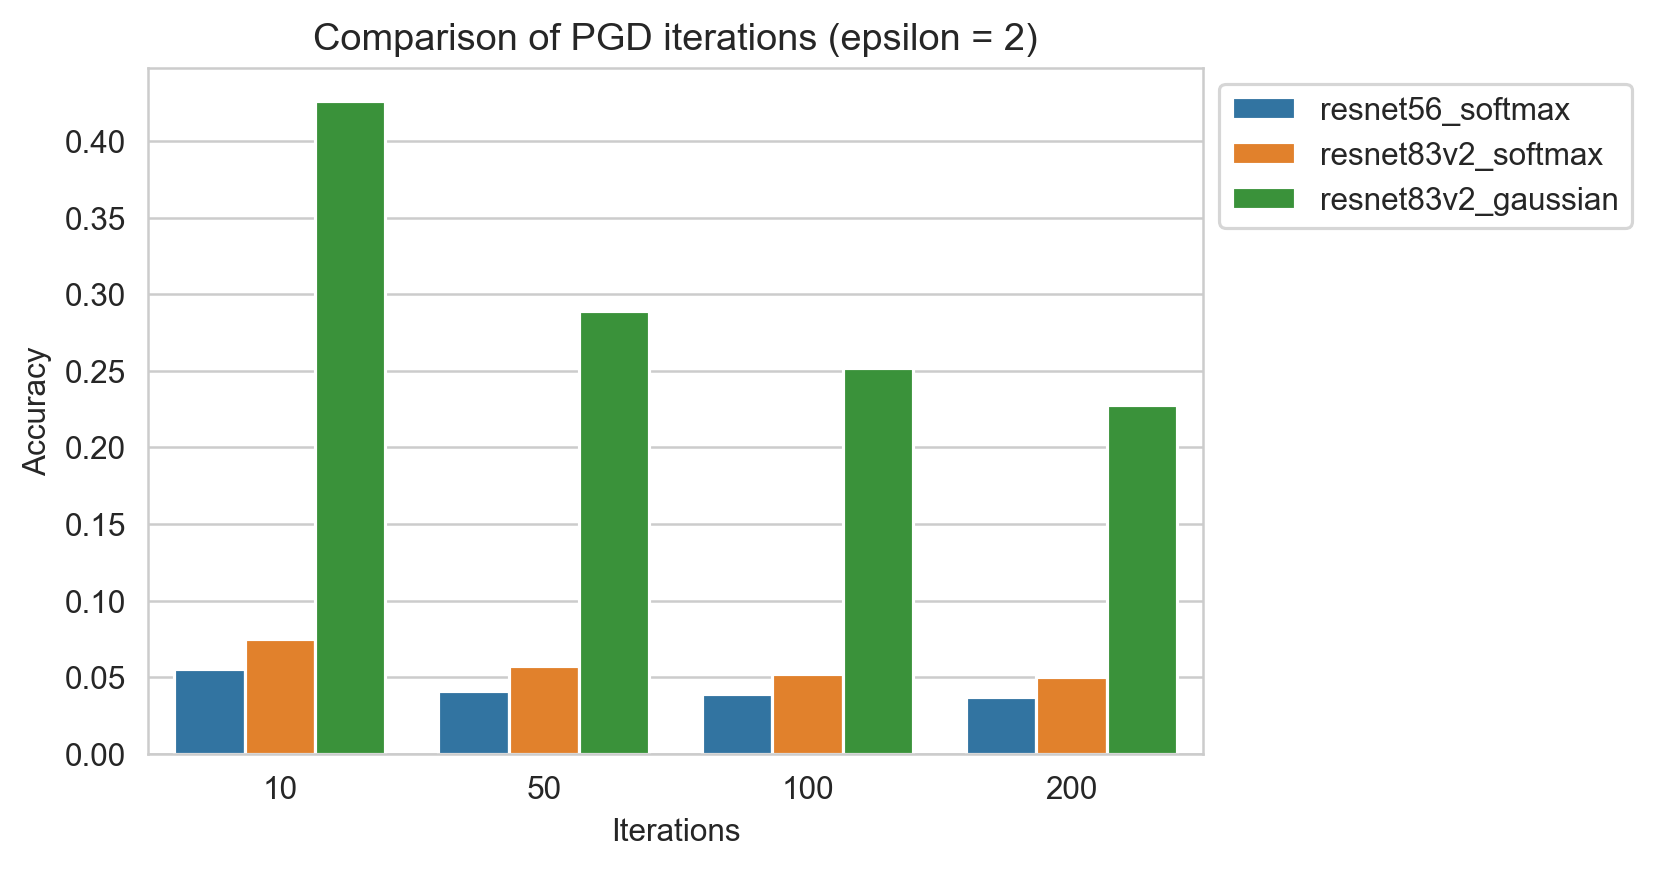

In [83]:
g = sns.barplot(x="Iterations", y="Accuracy", hue="Model", data=df)
g.set_title("Comparison of PGD iterations (epsilon = 2)")
g.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Effect of random sampling (200 restarts)

In [84]:
models = ("resnet56_softmax", "resnet83v2_softmax", "resnet83v2_gaussian")
epsilons = (0, 1, 2, 4, 8)

data = []
for model in models:
    for epsilon in epsilons:
        filepath = from_root(f"results/{model}_cifar10/inference/id_val.json") if epsilon == 0 \
            else from_root(f"results/{model}_cifar10/inference/random_sampling_{epsilon}.json")
        
        with open(filepath, "r") as file:
            predictions = json.load(file)
        
        accuracy = compute_accuracy(predictions)
        data.append((epsilon, accuracy, model))
    
df = pd.DataFrame(data=data, columns=["Epsilon", "Accuracy", "Model"])

[(0.0, 1.0)]

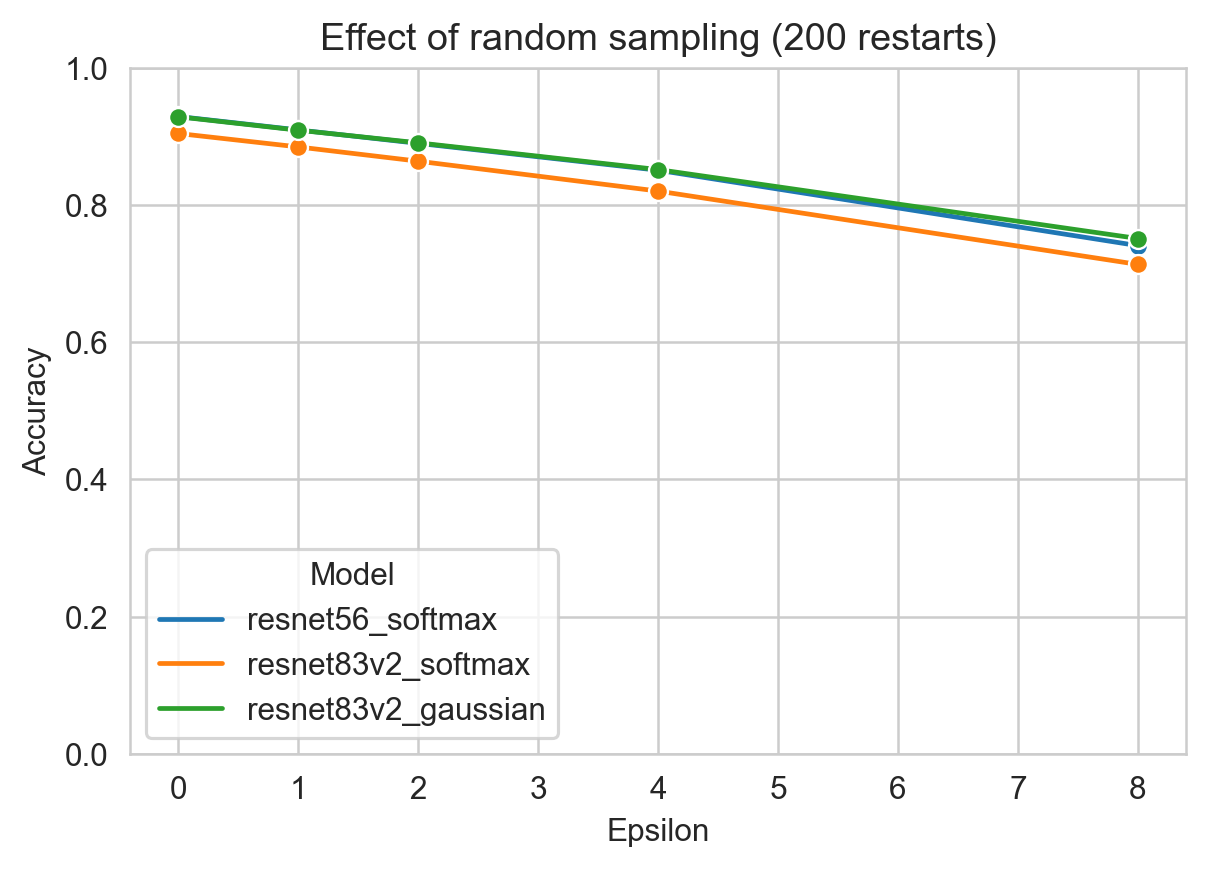

In [85]:
g = sns.lineplot(x="Epsilon", y="Accuracy", hue="Model", data=df, marker="o")
g.set_title("Effect of random sampling (200 restarts)")
g.set(ylim=(0, 1))

# Effect of SPSA (10 iterations)

In [3]:
models = ("resnet56_softmax", "resnet83v2_softmax", "resnet83v2_gaussian")
epsilons = (0, 1, 2, 4, 8)

data = []
for model in models:
    for epsilon in epsilons:
        filepath = from_root(f"results/{model}_cifar10/inference/id_val.json") if epsilon == 0 \
            else from_root(f"results/{model}_cifar10/inference/spsa_10_{epsilon}.json")
        
        with open(filepath, "r") as file:
            predictions = json.load(file)
        
        accuracy = compute_accuracy(predictions)
        data.append((epsilon, accuracy, model))
    
df = pd.DataFrame(data=data, columns=["Epsilon", "Accuracy", "Model"])

[(0.0, 1.0)]

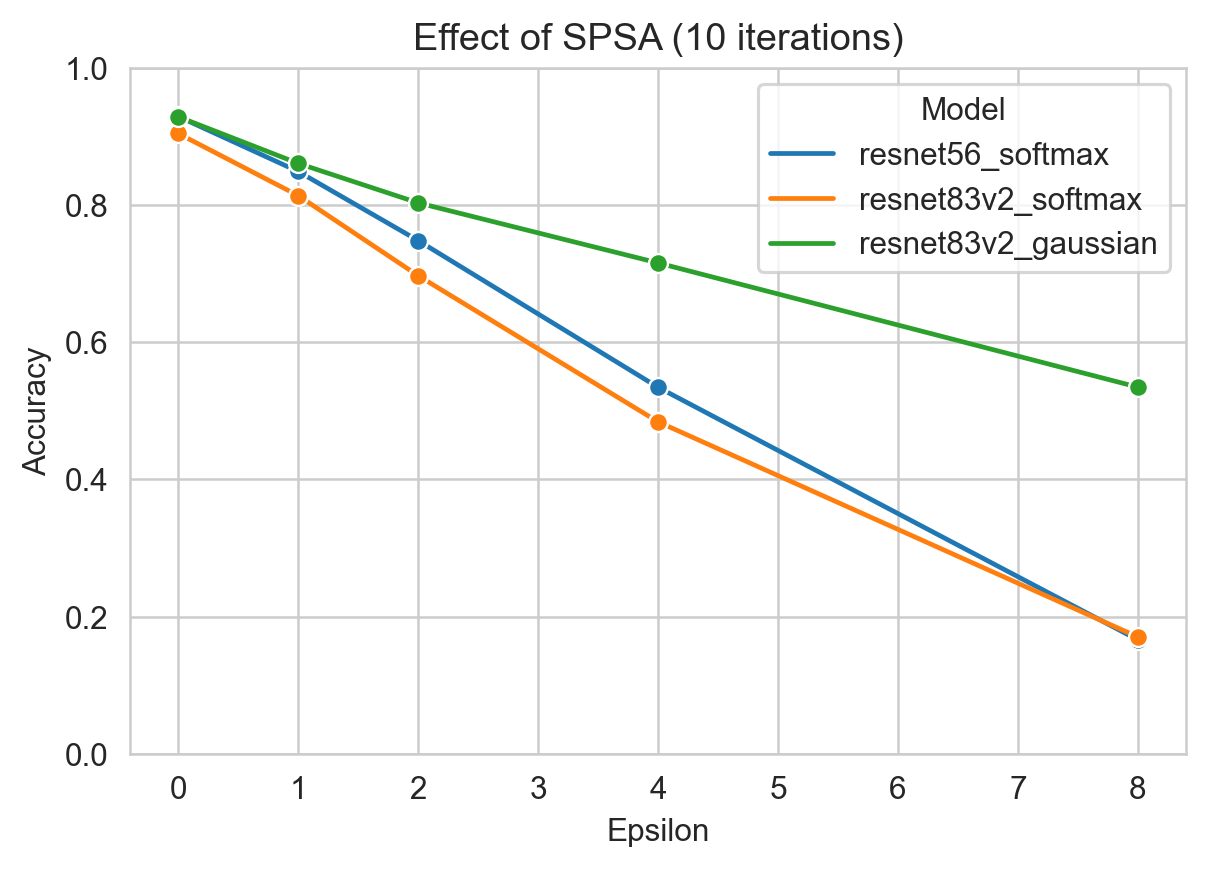

In [5]:
g = sns.lineplot(x="Epsilon", y="Accuracy", hue="Model", data=df, marker="o")
g.set_title("Effect of SPSA (10 iterations)")
g.set(ylim=(0, 1))

# Effect of momentum transfer (10 iterations, decay factor = 1.0)

In [6]:
models = ("resnet83v2_gaussian",)
epsilons = (0, 1, 2, 4, 8)

data = []
for model in models:
    for epsilon in epsilons:
        filepath = from_root(f"results/{model}_cifar10/inference/id_val.json") if epsilon == 0 \
            else from_root(f"results/{model}_cifar10/inference/momentum_fgsm_transfer_{epsilon}.json")
        
        with open(filepath, "r") as file:
            predictions = json.load(file)
        
        accuracy = compute_accuracy(predictions)
        data.append((epsilon, accuracy, model))

df = pd.DataFrame(data=data, columns=["Epsilon", "Accuracy", "Model"])

[(0.0, 1.0)]

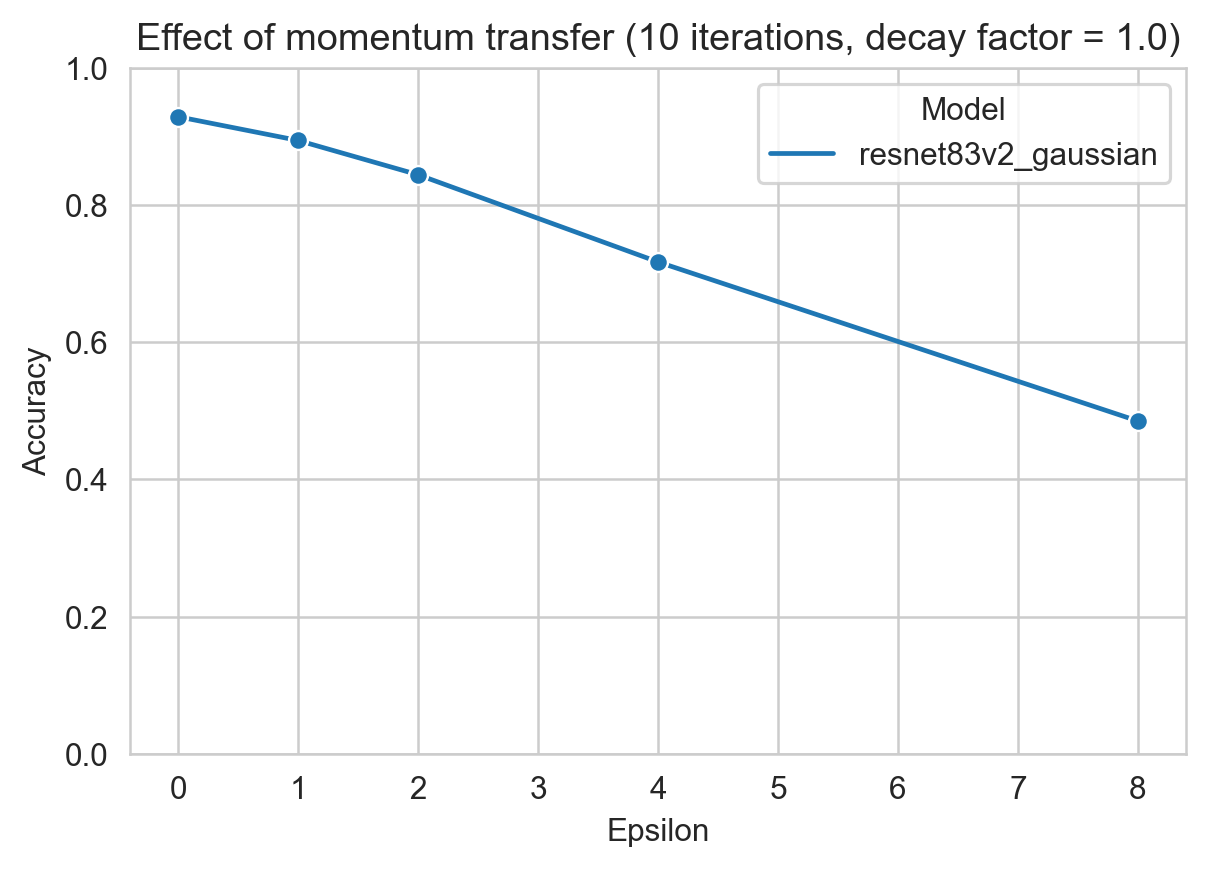

In [7]:
g = sns.lineplot(x="Epsilon", y="Accuracy", hue="Model", data=df, marker="o")
g.set_title("Effect of momentum transfer (10 iterations, decay factor = 1.0)")
g.set(ylim=(0, 1))

# Norm of perturbations found by Carlini and Wagner

In [26]:
models = ("resnet56_softmax", "resnet83v2_softmax", "resnet83v2_gaussian")

data = []
for model in models:
    with open(from_root(f"results/{model}_cifar10/inference/carlini_and_wagner.json"), "r") as file:
        predictions = json.load(file)
    data += [(prediction["noise_l2_norm"], model) for prediction in predictions]

df = pd.DataFrame(data=data, columns=["Perturbation L2-norm", "Model"])

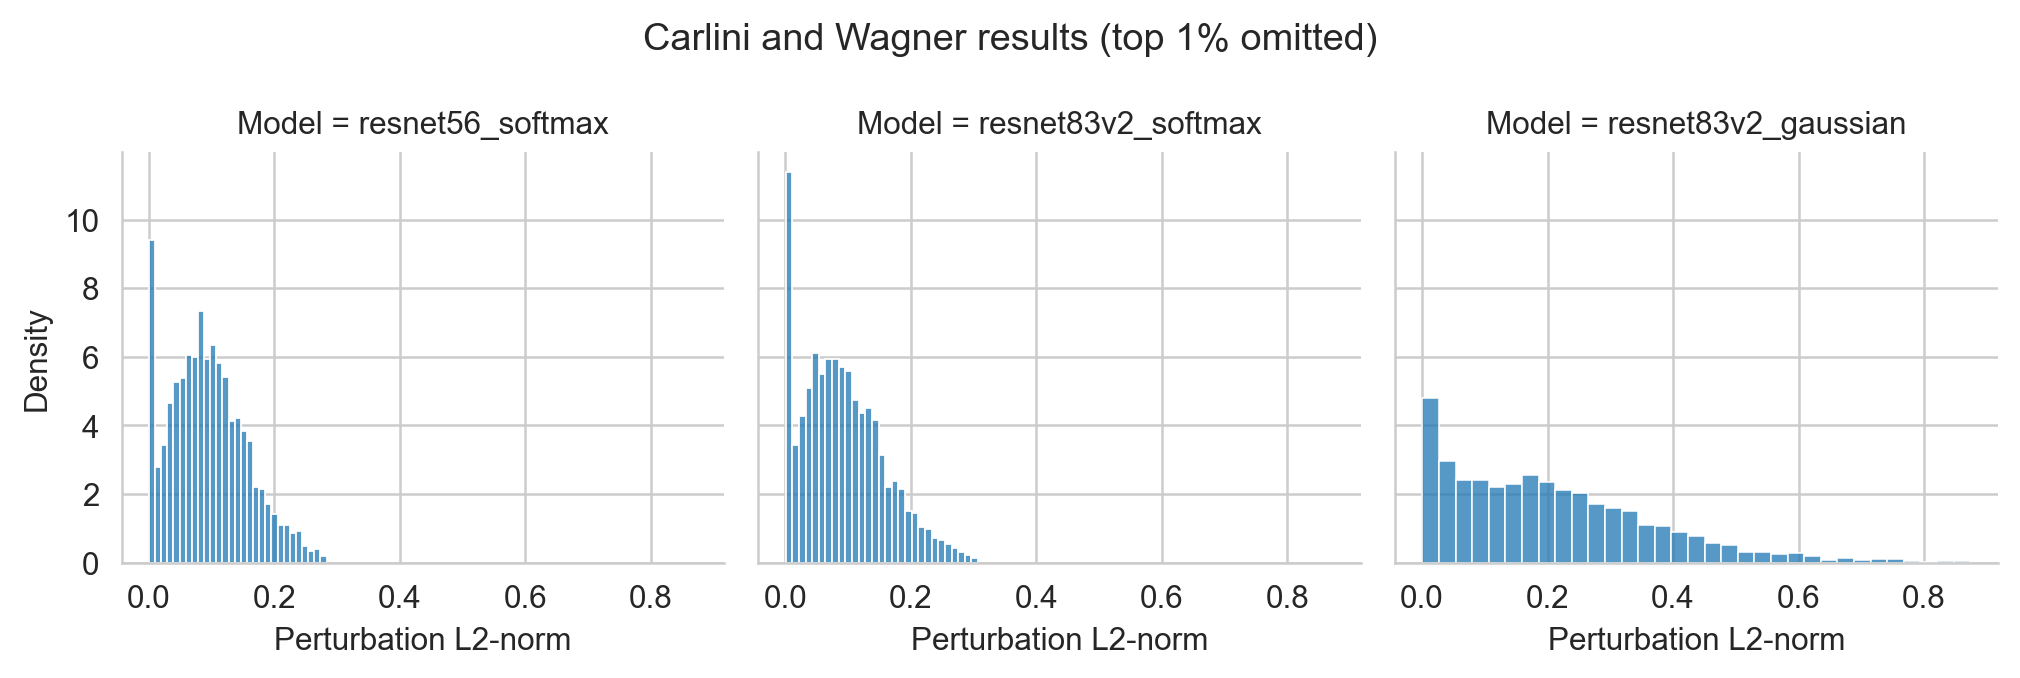

In [29]:
g = sns.FacetGrid(
    remove_outliers(df, "Perturbation L2-norm", "Model", max_q=99),
    col="Model", col_order=models
)
g.map(sns.histplot, "Perturbation L2-norm", stat="density")
g.set_axis_labels(y_var="Density")

g.fig.suptitle("Carlini and Wagner results (top 1% omitted)")
g.fig.tight_layout()

Text(0.5, 1.0, 'Carlini and Wagner results (outliers omitted)')

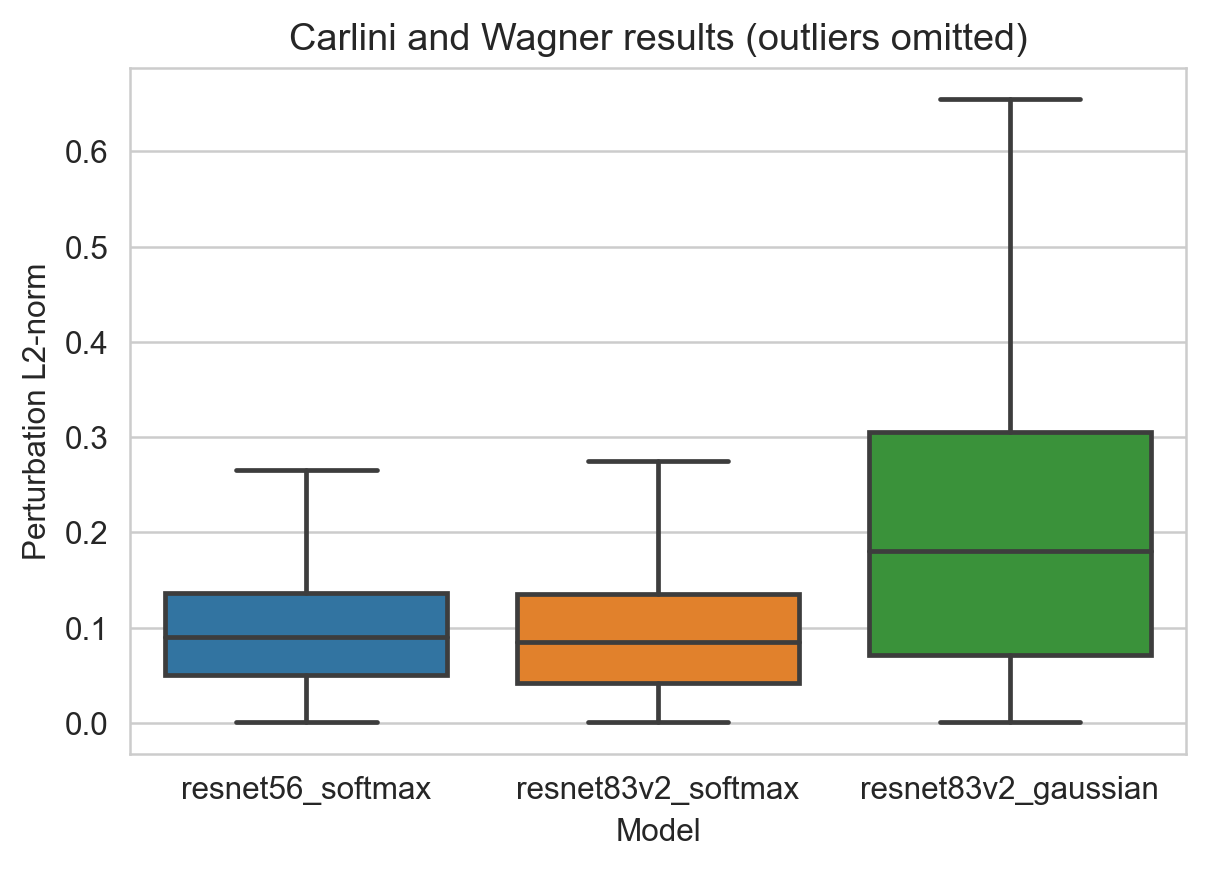

In [9]:
g = sns.boxplot(x="Model", y="Perturbation L2-norm", data=df, showfliers=False)
g.set_title("Carlini and Wagner results (outliers omitted)")

# Generated adversarial examples and perturbations

In [82]:
with open(from_root("data/cifar10/cifar-10-batches-py/batches.meta"), "rb") as file:
    batches = pickle.load(file)
classes = batches["label_names"]

epsilon = 8
n_images = 10

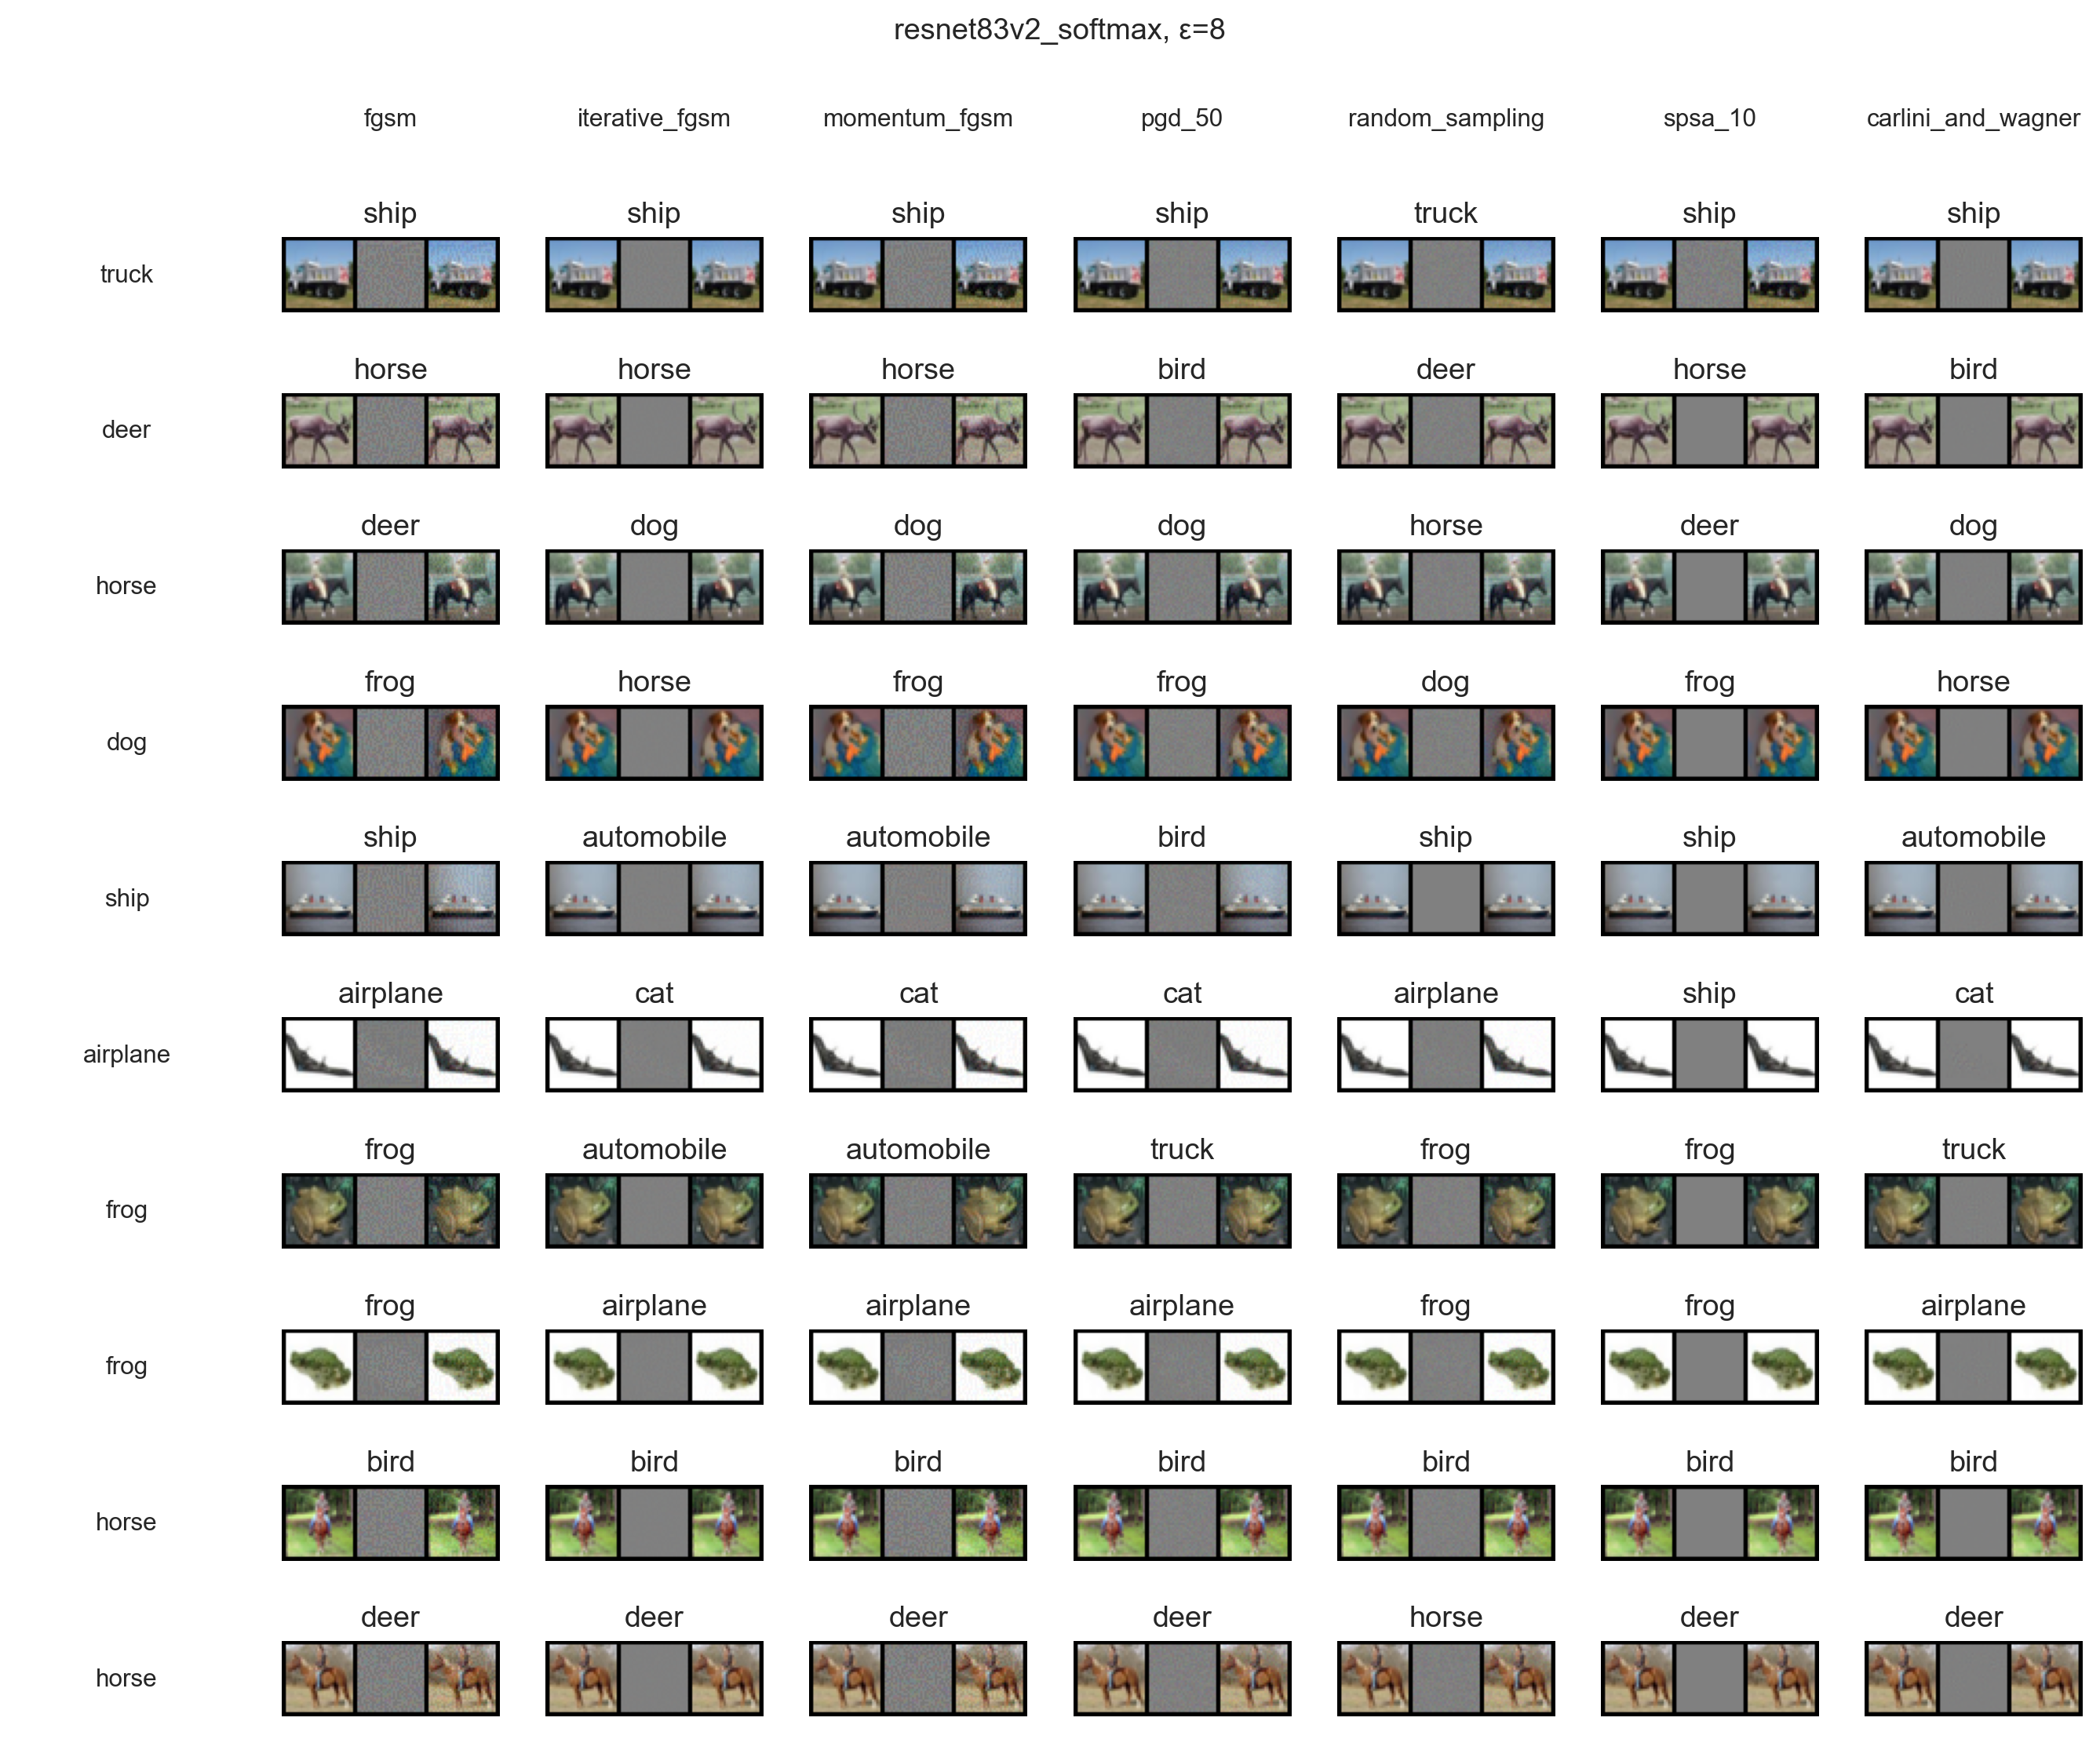

In [85]:
adversaries = (
    "fgsm", "iterative_fgsm", "momentum_fgsm", "pgd_50",
    "random_sampling", "spsa_10", "carlini_and_wagner"
)
model = "resnet83v2_softmax"

fig, ax = plt.subplots(nrows=1 + n_images, ncols=1 + len(adversaries), figsize=(12, 10))

# ==============================================================================
# plot true labels of images

with open(from_root(f"results/{model}_cifar10/inference/id_val.json"), "r") as file:
    predictions = json.load(file)

for i in range(n_images):
    true_index = predictions[i]["true_label"]
    true_label = classes[true_index]
    center_text(ax[i + 1, 0], true_label)

# ==============================================================================
# plot names of adversaries

for j, adversary in enumerate(adversaries):
    center_text(ax[0, j + 1], adversary)

# ==============================================================================
# plot images

for j, adversary in enumerate(adversaries):
    fs_name = adversary if adversary == "carlini_and_wagner" else f"{adversary}_{epsilon}"
    with open(from_root(f"results/{model}_cifar10/inference/{fs_name}.json"), "r") as file:
        predictions = json.load(file)
    
    for i in range(n_images):
        image = plt.imread(from_root(f"results/{model}_cifar10/inference_debug/{fs_name}/image_{i + 1}.png"))
        ax[i + 1, j + 1].imshow(image)
        
        pred_index = argmax(predictions[i]["log_probs"])
        pred_label = classes[pred_index]
        ax[i + 1, j + 1].set_title(pred_label)
        
# ==============================================================================
# turn off axis ticks

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i, j].axis("off")

fig.suptitle(f"{model}, ε={epsilon}")
fig.tight_layout()

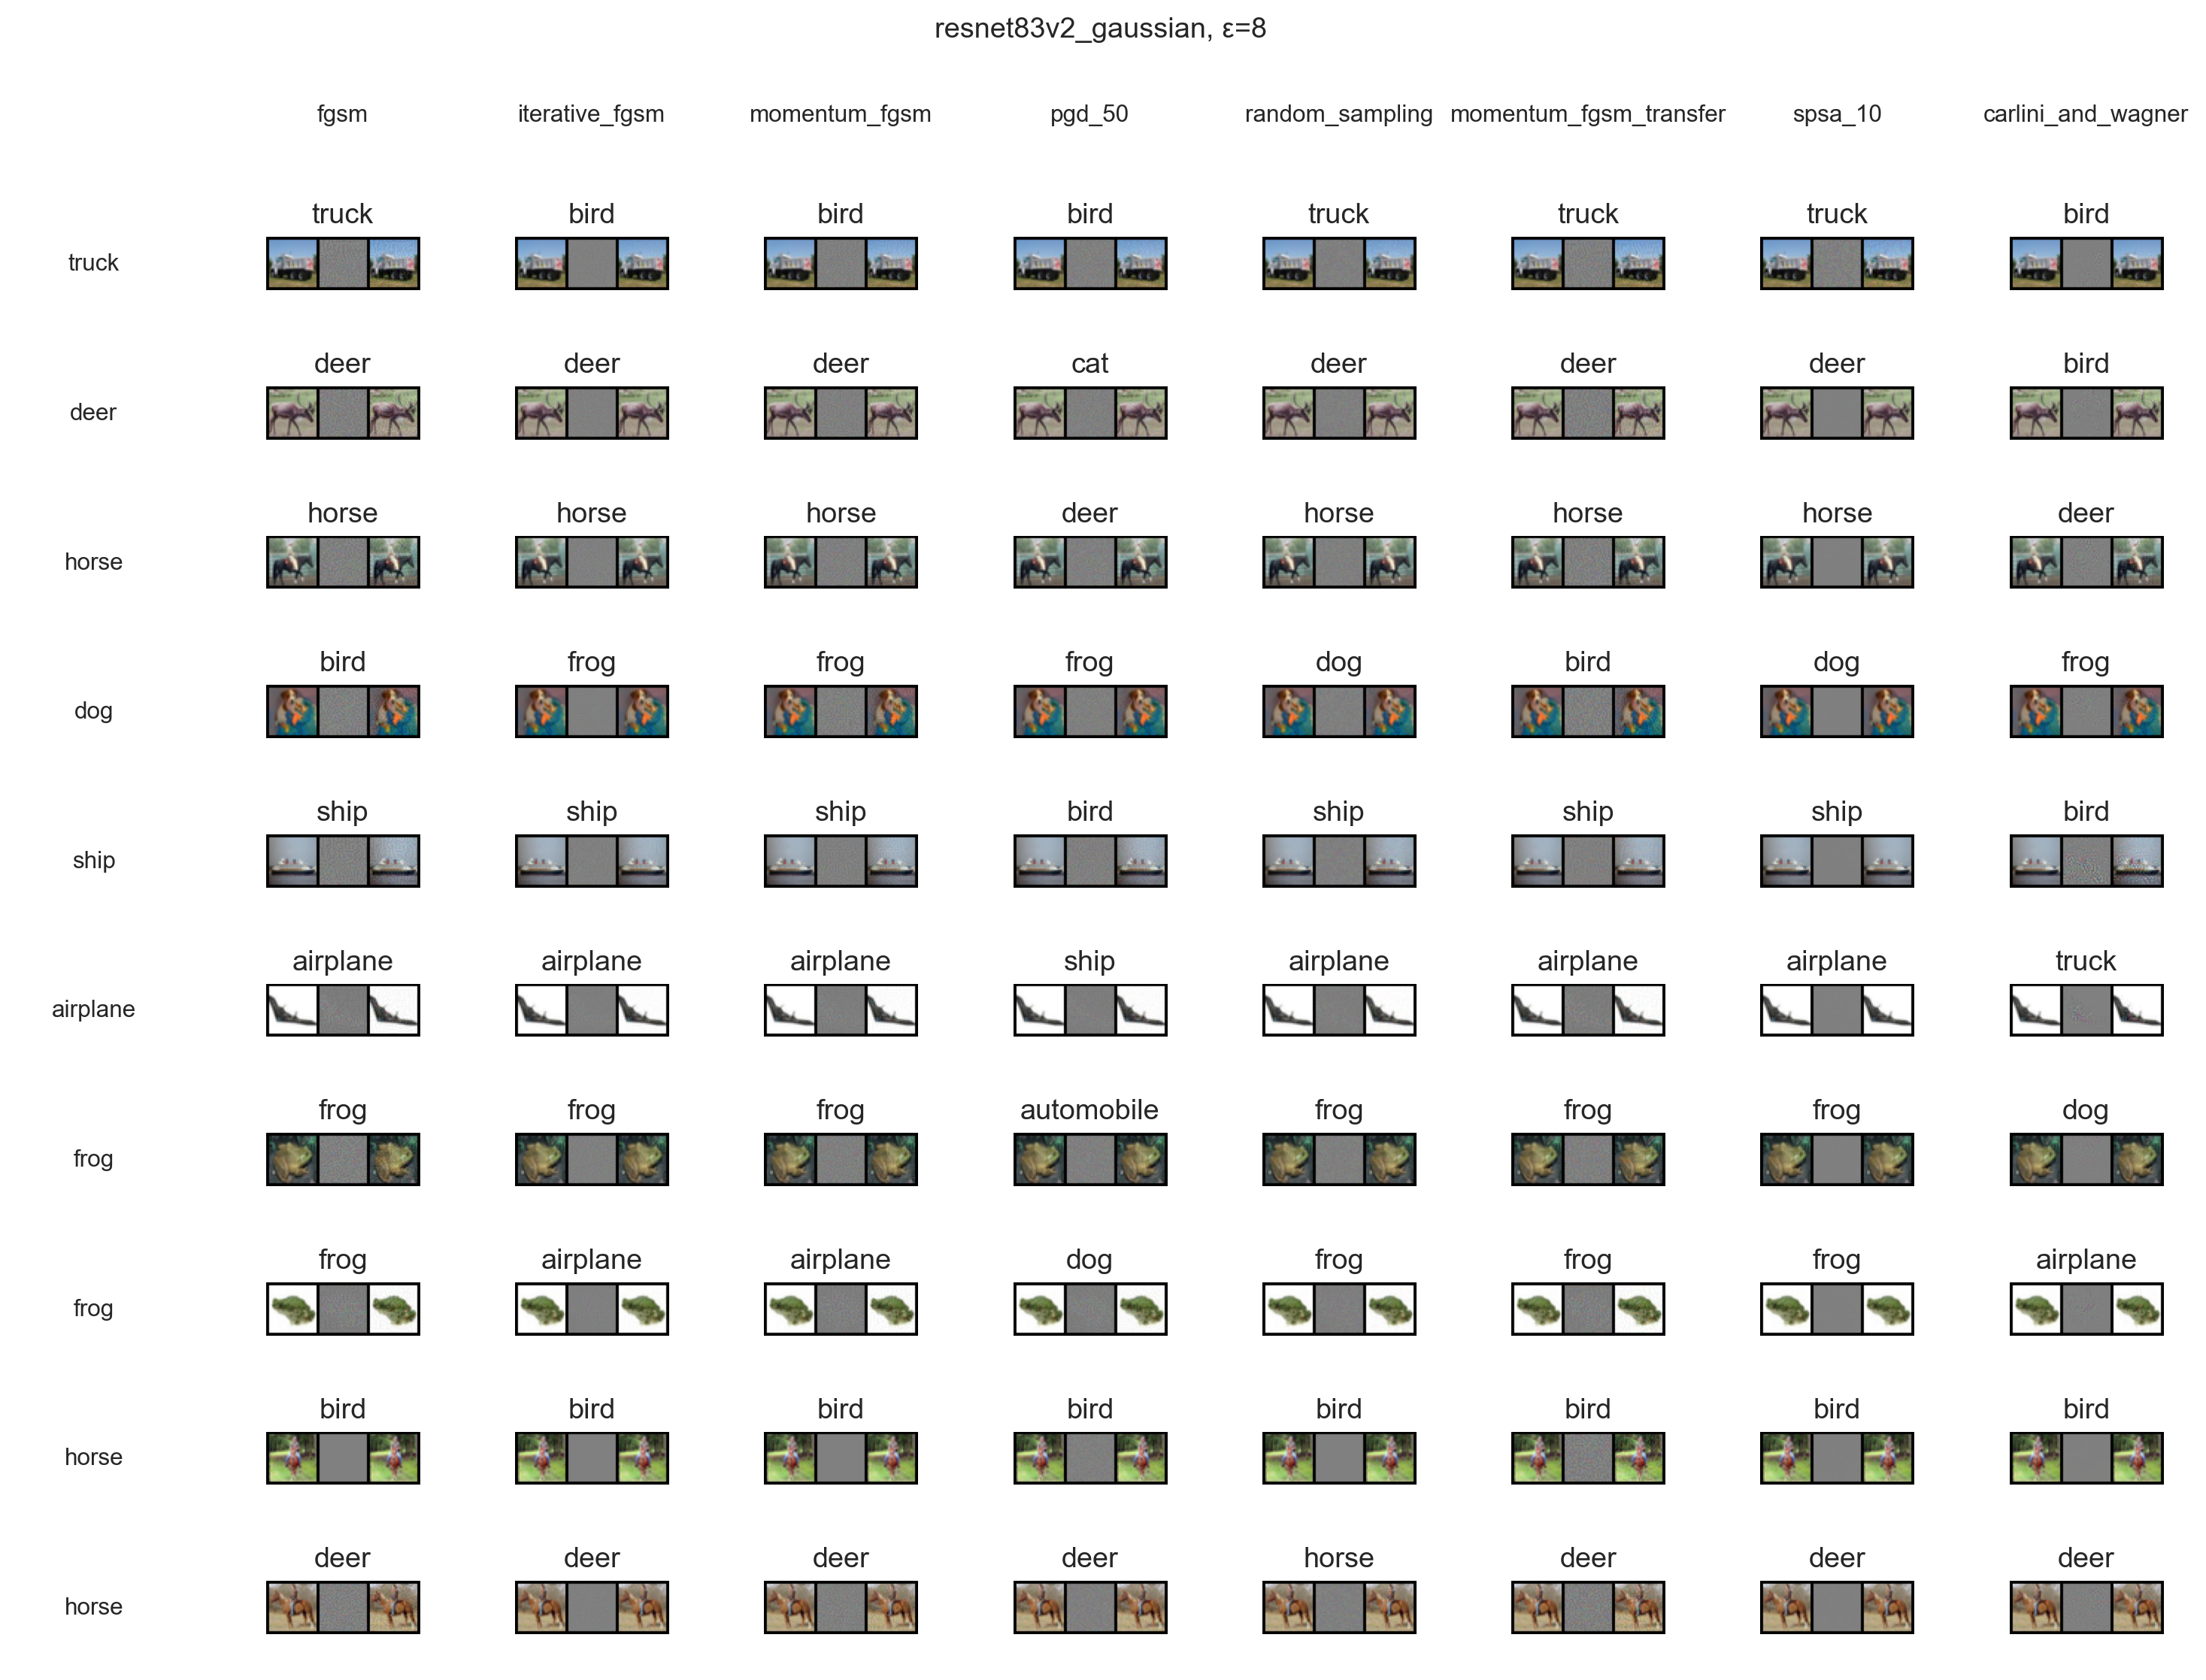

In [87]:
adversaries = (
    "fgsm", "iterative_fgsm", "momentum_fgsm", "pgd_50",
    "random_sampling", "momentum_fgsm_transfer", "spsa_10", "carlini_and_wagner"
)
model = "resnet83v2_gaussian"

fig, ax = plt.subplots(nrows=1 + n_images, ncols=1 + len(adversaries), figsize=(13, 10))

# ==============================================================================
# plot true labels of images

with open(from_root(f"results/{model}_cifar10/inference/id_val.json"), "r") as file:
    predictions = json.load(file)

for i in range(n_images):
    true_index = predictions[i]["true_label"]
    true_label = classes[true_index]
    center_text(ax[i + 1, 0], true_label)

# ==============================================================================
# plot names of adversaries

for j, adversary in enumerate(adversaries):
    center_text(ax[0, j + 1], adversary)

# ==============================================================================
# plot images

for j, adversary in enumerate(adversaries):
    fs_name = adversary if adversary == "carlini_and_wagner" else f"{adversary}_{epsilon}"
    with open(from_root(f"results/{model}_cifar10/inference/{fs_name}.json"), "r") as file:
        predictions = json.load(file)
    
    for i in range(n_images):
        image = plt.imread(from_root(f"results/{model}_cifar10/inference_debug/{fs_name}/image_{i + 1}.png"))
        ax[i + 1, j + 1].imshow(image)
        
        pred_index = argmax(predictions[i]["log_probs"])
        pred_label = classes[pred_index]
        ax[i + 1, j + 1].set_title(pred_label)
        
# ==============================================================================
# turn off axis ticks

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i, j].axis("off")

fig.suptitle(f"{model}, ε={epsilon}")
fig.tight_layout()